# Ch1

In [32]:
!uv add opencv-python matplotlib

Resolved 110 packages in 803ms                                       
Prepared 6 packages in 653ms                                             
Installed 9 packages in 8ms                                 
 + contourpy==1.3.1
 + cycler==0.12.1
 + fonttools==4.55.8
 + kiwisolver==1.4.8
 + matplotlib==3.10.0
 + numpy==2.2.2
 + opencv-python==4.11.0.86
 + pillow==11.1.0
 + pyparsing==3.2.1


In [1]:
from pathlib import Path
ret = !pwd
DATA_DIR = Path(ret[0]) / "data"
IMORI_IMAGE = DATA_DIR / "Q01.imori.jpg"

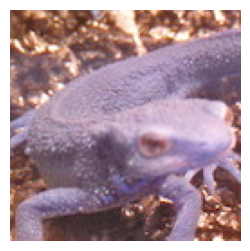

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(IMORI_IMAGE)

def imshow(img:np.ndarray):
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(img)
    ax.axis("off")
imshow(img)

## Q01

画像の入れ替え.
RGB→BGRへ変換する.

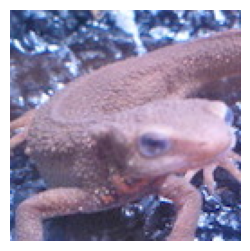

In [3]:
B_index, G_index, R_index = 0,1,2
b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
q1_img = img.copy()
q1_img[:,:,R_index] = b
q1_img[:,:,G_index] = g
q1_img[:,:,B_index] = r
imshow(q1_img)

## Q02

画像をグレースケールに変換する.

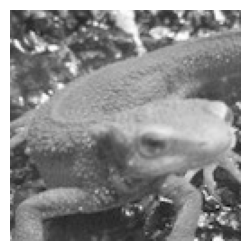

In [44]:
B_index, G_index, R_index = 0,1,2
b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
q2_img = img.copy()
Y = 0.2126 * r + 0.7152 * g + 0.0722 * b
q2_img[:,:,R_index] = Y
q2_img[:,:,G_index] = Y
q2_img[:,:,B_index] = Y
imshow(q2_img)

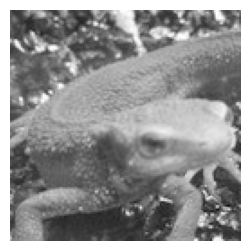

In [39]:
# by opencv
q2_cv_img = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("test.jpg", img_gray)
img_gray = cv2.imread("test.jpg")
!rm test.jpg
imshow(img_gray)

# Q03

画像2値化

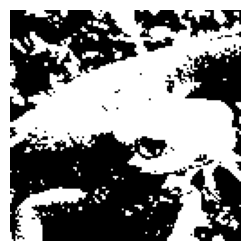

In [55]:
B_index, G_index, R_index = 0,1,2
b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
q3_img = img.copy()
Y = 0.2126 * r + 0.7152 * g + 0.0722 * b
Y[Y < 128] = 0
Y[Y > 0] = 255
q3_img[:,:, R_index] = Y
q3_img[:,:, G_index] = Y
q3_img[:,:, B_index] = Y
imshow(q3_img)

In [95]:
q3_cv_img = img.copy()
ret, img_thresh = cv2.threshold(q3_cv_img, 128, 255, cv2.THRESH_BINARY)
#imshow(img_thresh)

## Q04

大津の二値化

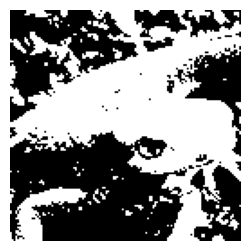

In [70]:
B_index, G_index, R_index = 0,1,2
b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
q4_img = img.copy()
Y = 0.2126 * r + 0.7152 * g + 0.0722 * b
current_criteria = 0
current_t = 0
for t in range(0, 256):
    w_total = Y.shape[0] * Y.shape[1]
    part_0 = Y <= t
    part_1 = Y > t
    w_0 = part_0.sum() / w_total
    w_1 = part_1.sum() / w_total
    assert w_0 + w_1 == 1
    img_part_0 = Y[part_0]
    img_part_1 = Y[part_1]
    M_0 = np.mean(img_part_0)
    M_1 = np.mean(img_part_1)

    S_b = w_0 * w_1 * ((M_0 - M_1)**2)
    if current_criteria <= S_b:
        current_criteria = S_b
        current_t = t

    
Y[Y < current_t] = 0
Y[Y > 0] = 255
q3_img[:,:, R_index] = Y
q3_img[:,:, G_index] = Y
q3_img[:,:, B_index] = Y
imshow(q3_img)

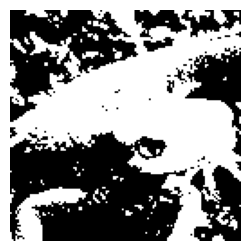

In [99]:
q4_cv_img = cv2.imread(IMORI_IMAGE, 0)
ret, img_thresh = cv2.threshold(q4_cv_img, 0, 255, cv2.THRESH_OTSU)
img_thresh = img_thresh.repeat(3).reshape(128,128, -1)
imshow(img_thresh)

## Q5???

HSV変換

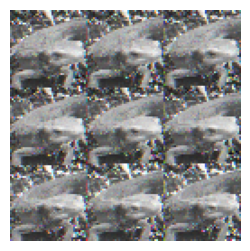

In [141]:
B_index, G_index, R_index = 0,1,2
b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
q5_img = img.copy()
base_shape = b.shape
rgb = np.stack([r.reshape(-1)/255, g.reshape(-1)/255, b.reshape(-1)/255])
rgb = rgb.transpose()
dot_maxs = np.max(rgb, axis=-1)
dot_mins = np.min(rgb, axis=-1)
dot_argmins = np.argmax(rgb, axis=-1)
H = np.zeros_like(dot_maxs)
for idx, (dot_max, dot_min, dot_argmin) in enumerate(zip(dot_maxs, dot_mins, dot_argmins)):
    if dot_max == dot_min:
        continue
    dot_r, dot_g, dot_b = rgb[idx]
    dot_diff = dot_max - dot_min
    if dot_argmin == 2:  # Min = B
        H[idx] = 60 * (dot_g - dot_r) / dot_diff + 60
    elif dot_argmin == 0:
        H[idx] = 60 * (dot_b - dot_g) / dot_diff + 180
    elif dot_argmin == 1:
        H[idx] = 60 * (dot_r - dot_b) / dot_diff + 300
V = dot_maxs
S = dot_maxs - dot_mins

H = (H + 180) % 360

C = S
H = H / 60
X = C * (1-np.abs(H % 2 - 1))
rgb_fixed = np.zeros_like(rgb)

for idx in range(rgb_fixed.shape[0]):
    c = C[idx]
    x = X[idx]
    h = H[idx]
    v = V[idx]

    parts = np.array((1,1,1))
    temp = np.array((0,0,0))
    if 0 <= h < 1:
        temp = np.array((c,x,0))
    elif 1 <= h < 2:
        temp = np.array((x,c,0))
    elif 2 <= h < 3:
        temp = np.array((0,c,x))
    elif 3 <= h < 4:
        temp = np.array((0,x,c))
    elif 4 <= h < 5:
        temp = np.array((x,0,c))
    elif 5 <= h < 6:
        temp = np.array((c,0,x))
    parts = parts + temp
    rgb_dot = (v-c) * parts
    rgb_fixed[idx] = rgb_dot
rgb_fixed = np.round(rgb_fixed * 255)
rgb_fixed = rgb_fixed.transpose().reshape(128,128,3).astype(np.uint8)
q5_img = img.copy()
q5_img[:,:, R_index] = rgb_fixed[:,:,0]
q5_img[:,:, G_index] = rgb_fixed[:,:,1]
q5_img[:,:, B_index] = rgb_fixed[:,:,2]
imshow(q5_img)

In [137]:
q5_img.shape

(128, 128, 3)

## Q6

原色処理

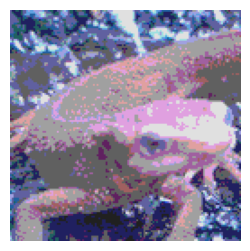

In [151]:
img_q6 = q1_img.copy()

img_q6[img_q6 < 64] = 32
img_q6[(img_q6 >= 64) & (img_q6 < 128)] = 96
img_q6[(img_q6 >= 128) & (img_q6 < 192)] = 160
img_q6[img_q6 >=192] = 224

imshow(img_q6)

## Q7

平均プーリング

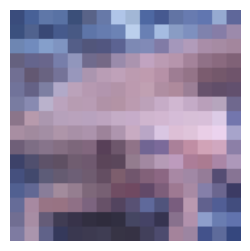

In [164]:
q7_img = q1_img.copy()
num_window = 16
window_x = q7_img.shape[0] // num_window
window_y = q7_img.shape[1] // num_window
for i in range(num_window):
    for j in range(num_window):
        v = q7_img[window_x * i:window_x * (i + 1) , window_y*j:window_y * (j + 1)].copy()
        v[:,:, R_index] = np.mean(v[:,:, R_index])
        v[:,:, G_index] = np.mean(v[:,:, G_index])
        v[:,:, B_index] = np.mean(v[:,:, B_index])
        q7_img[window_x * i: window_x * (i+1),window_y*j:window_y * (j+1)] = v
    
imshow(q7_img)

## Q8

Max pooling

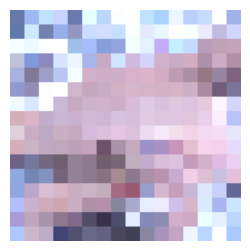

In [166]:
q8_img = q1_img.copy()
num_window = 16
window_x = q8_img.shape[0] // num_window
window_y = q8_img.shape[1] // num_window
for i in range(num_window):
    for j in range(num_window):
        v = q8_img[window_x * i:window_x * (i + 1) , window_y*j:window_y * (j + 1)].copy()
        v[:,:, R_index] = np.max(v[:,:, R_index])
        v[:,:, G_index] = np.max(v[:,:, G_index])
        v[:,:, B_index] = np.max(v[:,:, B_index])
        q8_img[window_x * i: window_x * (i+1),window_y*j:window_y * (j+1)] = v
    
imshow(q8_img)

## Q9

ガウシアンフィルタ

In [31]:
img_noise = cv2.imread("data/imori_noise.jpg")
def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img_noise = to_rgb(img_noise)


gaussian_kernel = np.array([[1,2,1],[2,4,2], [1,2,1]], dtype=float) * 1/16

def calc_gaussian_patch(img_patch):
    return np.round(np.sum(img_patch * gaussian_kernel)).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_gaussian_patch, kernel_size=3)
imshow(img_ret)

## Q10

メディアンフィルタ

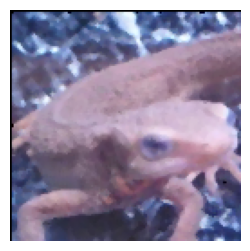

In [33]:
img_noise = cv2.imread("data/imori_noise.jpg")
def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img_noise = to_rgb(img_noise)



def calc_median_patch(img_patch):
    return np.round(np.median(img_patch)).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_median_patch, kernel_size=3)
imshow(img_ret)

## Q11

平滑化フィルタ

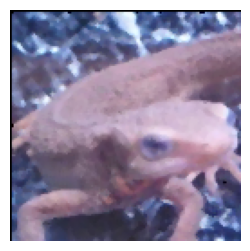

In [34]:
img_noise = cv2.imread("data/imori_noise.jpg")
def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img_noise = to_rgb(img_noise)



def calc_mean_patch(img_patch):
    return np.round(np.mean(img_patch)).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_median_patch, kernel_size=3)
imshow(img_ret)

## Q12

モーションフィルタ

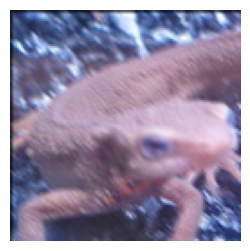

In [39]:
img_noise = cv2.imread("data/Q01.imori.jpg")
def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img_noise = to_rgb(img_noise)



def calc_motion_patch(img_patch):
    return np.round(np.mean(np.diag(img_patch))).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_motion_patch, kernel_size=3)
imshow(img_ret)

## Q13

MAX-MIN フィルタ

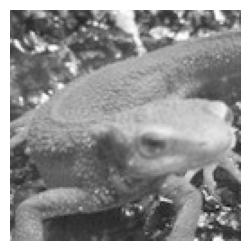

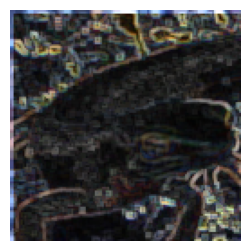

In [53]:
img = cv2.imread("data/Q01.imori.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

img_gray_Y = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img, dtype=np.uint8)
img_gray[:,:,0] = img_gray_Y
img_gray[:,:,1] = img_gray_Y
img_gray[:,:,2] = img_gray_Y

imshow(img_gray)


def calc_max_min_patch(img_patch):
    patch_max = np.max(img_patch)
    patch_min = np.min(img_patch)
    patch_diff = patch_max - patch_min
    return np.round(patch_diff).clip(0,255).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_max_min_patch, kernel_size=3)
imshow(img_ret)

## Q14

微分フィルタ

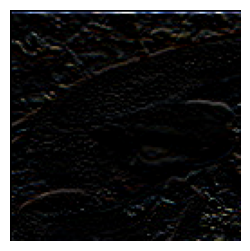

In [52]:
img = cv2.imread("data/Q01.imori.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

img_gray_Y = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img, dtype=np.uint8)
img_gray[:,:,0] = img_gray_Y
img_gray[:,:,1] = img_gray_Y
img_gray[:,:,2] = img_gray_Y

def calc_diff_col_patch(img_patch):
    kernel = np.array([[0,-1,0],[0,1,0],[0,0,0]])
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_diff_col_patch, kernel_size=3)
imshow(img_ret)

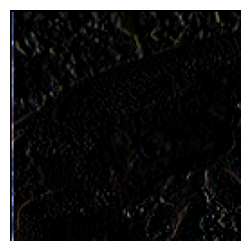

In [51]:
def calc_diff_row_patch(img_patch):
    kernel = np.array([[0,0,0],[-1,1,0],[0,0,0]])
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_diff_row_patch, kernel_size=3)
imshow(img_ret)

## Q15

Sobelフィルタ

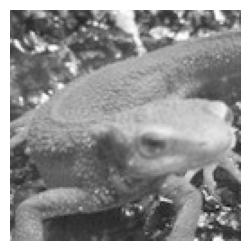

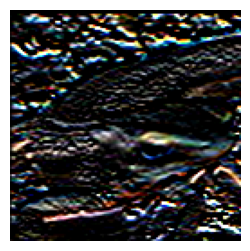

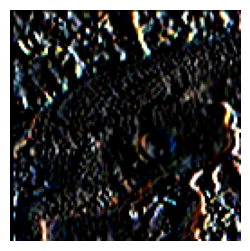

In [56]:
img = cv2.imread("data/Q01.imori.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

img_gray_Y = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img, dtype=np.uint8)
img_gray[:,:,0] = img_gray_Y
img_gray[:,:,1] = img_gray_Y
img_gray[:,:,2] = img_gray_Y

imshow(img_gray)


def calc_sobel_row_patch(img_patch):
    kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)

def calc_sobel_col_patch(img_patch):
    kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_sobel_row_patch, kernel_size=3)
imshow(img_ret)
img_ret = apply_kernel(img_noise, calc_sobel_col_patch, kernel_size=3)
imshow(img_ret)

## Q16

Prewittフィルタ

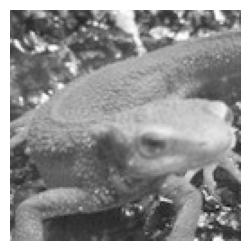

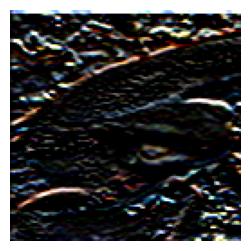

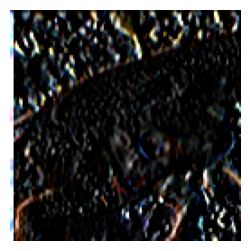

In [58]:
img = cv2.imread("data/Q01.imori.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

img_gray_Y = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img, dtype=np.uint8)
img_gray[:,:,0] = img_gray_Y
img_gray[:,:,1] = img_gray_Y
img_gray[:,:,2] = img_gray_Y

imshow(img_gray)


def calc_prewitt_row_patch(img_patch):
    kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)

def calc_prewitt_col_patch(img_patch):
    kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)

def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_prewitt_row_patch, kernel_size=3)
imshow(img_ret)
img_ret = apply_kernel(img_noise, calc_prewitt_col_patch, kernel_size=3)
imshow(img_ret)

## Q17

ラプラシアンフィルタ

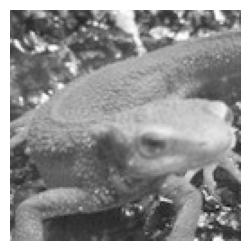

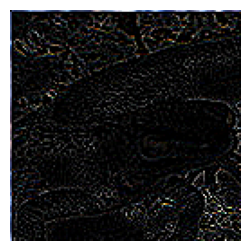

In [59]:
img = cv2.imread("data/Q01.imori.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

img_gray_Y = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img, dtype=np.uint8)
img_gray[:,:,0] = img_gray_Y
img_gray[:,:,1] = img_gray_Y
img_gray[:,:,2] = img_gray_Y

imshow(img_gray)


def calc_laplacian_patch(img_patch):
    kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)


def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_noise, calc_laplacian_patch, kernel_size=3)
imshow(img_ret)


## Q18

Embossフィルタ

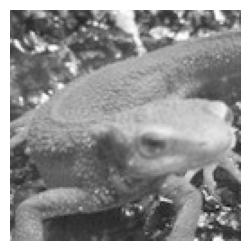

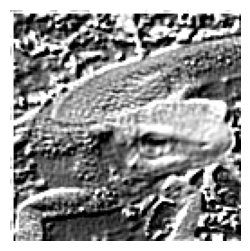

In [61]:
img = cv2.imread("data/Q01.imori.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

img_gray_Y = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img, dtype=np.uint8)
img_gray[:,:,0] = img_gray_Y
img_gray[:,:,1] = img_gray_Y
img_gray[:,:,2] = img_gray_Y

imshow(img_gray)


def calc_emboss_patch(img_patch):
    kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
    
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)


def apply_kernel(img, kernel_func, kernel_size=3):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_gray, calc_emboss_patch, kernel_size=3)
imshow(img_ret)


## Q19??

LoGフィルタ

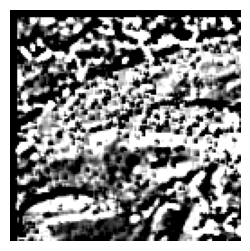

In [70]:
img = cv2.imread("data/imori_noise.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

img_gray_Y = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img, dtype=np.uint8)
img_gray[:,:,0] = img_gray_Y
img_gray[:,:,1] = img_gray_Y
img_gray[:,:,2] = img_gray_Y



kernel_size = 5
sigma = 3
kernel = np.zeros((kernel_size,kernel_size))
for x in range(kernel_size):
    for y in range(kernel_size):
        kernel[x,y] = (x ** 2 + y ** 2 - sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * (sigma ** 2))) / (2 * np.pi *(sigma ** 6))
kernel = kernel / kernel.sum()
    

def calc_LoG_patch(img_patch):
    return np.round(np.sum(img_patch * kernel)).clip(0,255).astype(np.uint8)


def apply_kernel(img, kernel_func, kernel_size=5):
    img_padded = np.zeros((img.shape[0] + (kernel_size - 1) * 2, img.shape[1] + (kernel_size - 1) * 2, img.shape[2]), dtype=np.uint8)
    img_padded[kernel_size-1:-kernel_size+1, kernel_size-1:-kernel_size+1, :] = img
    img_ret = np.zeros_like(img, dtype=np.uint8)
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            for c in range(0, img.shape[2]):
                patch = img_padded[x:x+kernel_size, y:y+kernel_size, c]
                mapped_patch = kernel_func(patch)
                img_ret[x,y,c] = mapped_patch
    return img_ret
img_ret = apply_kernel(img_gray, calc_LoG_patch, kernel_size=5)
imshow(img_ret)


## Q20

ヒストグラム表示

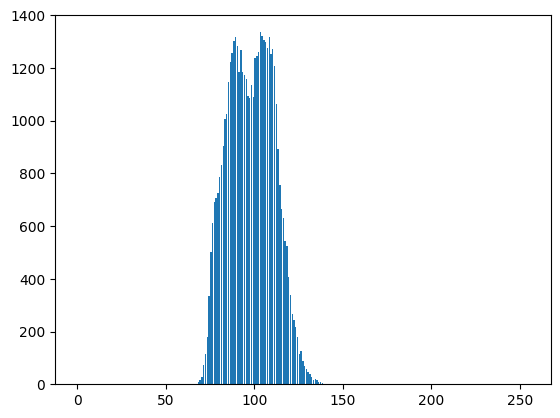

In [79]:
img = cv2.imread("data/imori_dark.jpg")

def to_rgb(img):   
    B_index, G_index, R_index = 0,1,2
    b,g,r = img[:,:,B_index].copy(), img[:,:,G_index].copy(),img[:,:,R_index].copy()
    rgb_img = img.copy()
    rgb_img[:,:,R_index] = b
    rgb_img[:,:,G_index] = g
    rgb_img[:,:,B_index] = r
    return rgb_img
img = to_rgb(img)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

## Q21

ヒストグラム正規化